## TSF-Grip : Task 6 - Prediction using Decision Tree Algorithm

# Author - Shashank K S

Decision tree classifiers are powerful supervised machine learning algorithm that is moslty used in solving classificaion problems but can also be used on Regression problems. Here I have used the decision tree classifier in order to predict the species of flower from the iris dataset.

In [ ]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt
import pandas as pd
import pydot
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import sklearn.metrics as sm
from sklearn.model_selection import train_test_split
from IPython.display import Image

# 1. Loading Data and Analysis

In [ ]:
iris=load_iris()
x=iris.data[:,:]
y=iris.target

A=pd.DataFrame(iris['data'],columns=["Petal Length","Petal Width","Sepal Length","Sepal Width"])
A['Species']=iris['target']
A['Species']=A['Species'].apply(lambda x: iris['target_names'][x])
A.head()

,Petal Length,Petal Width,Sepal Length,Sepal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
 A.describe()

,Petal Length,Petal Width,Sepal Length,Sepal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
A.shape

(150, 5)

# 2. Data Visualization

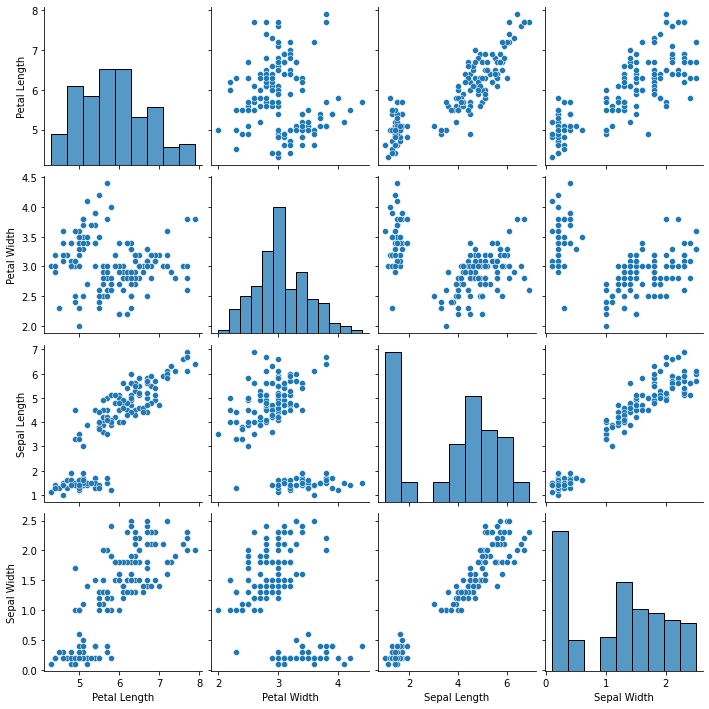

In [ ]:
sns.pairplot(A)

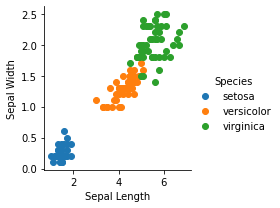

In [ ]:
sns.FacetGrid(A,hue='Species').map(plt.scatter,'Sepal Length','Sepal Width').add_legend()
plt.show()

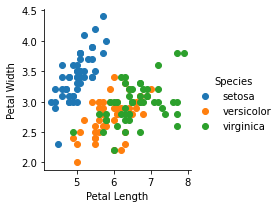

In [ ]:
sns.FacetGrid(A,hue='Species').map(plt.scatter,'Petal Length','Petal Width').add_legend()
plt.show()

# 3. Model Training

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=10,random_state=0)
classifier=DecisionTreeClassifier()
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred=classifier.predict(x_test)

# Comparing Prediction and Accuracy

In [ ]:
h=pd.DataFrame({'Predicted Data':y_pred,'Original Data':y_test})
display(h)

,Predicted Data,Original Data
0,2,2
1,1,1
2,0,0
3,2,2
4,0,0
5,2,2
6,0,0
7,1,1
8,1,1
9,1,1


In [ ]:
print("The accuracy of this model is ",sm.accuracy_score(y_test, y_pred)*100,"%")

The accuracy of this model is  100.0 %


# Visualization of the Decision Tree

In [ ]:
export_graphviz(classifier, out_file="img\desision_tree.dot",
        feature_names=iris.feature_names[:],
        class_names=iris.target_names,
        rounded=True,filled=True
)

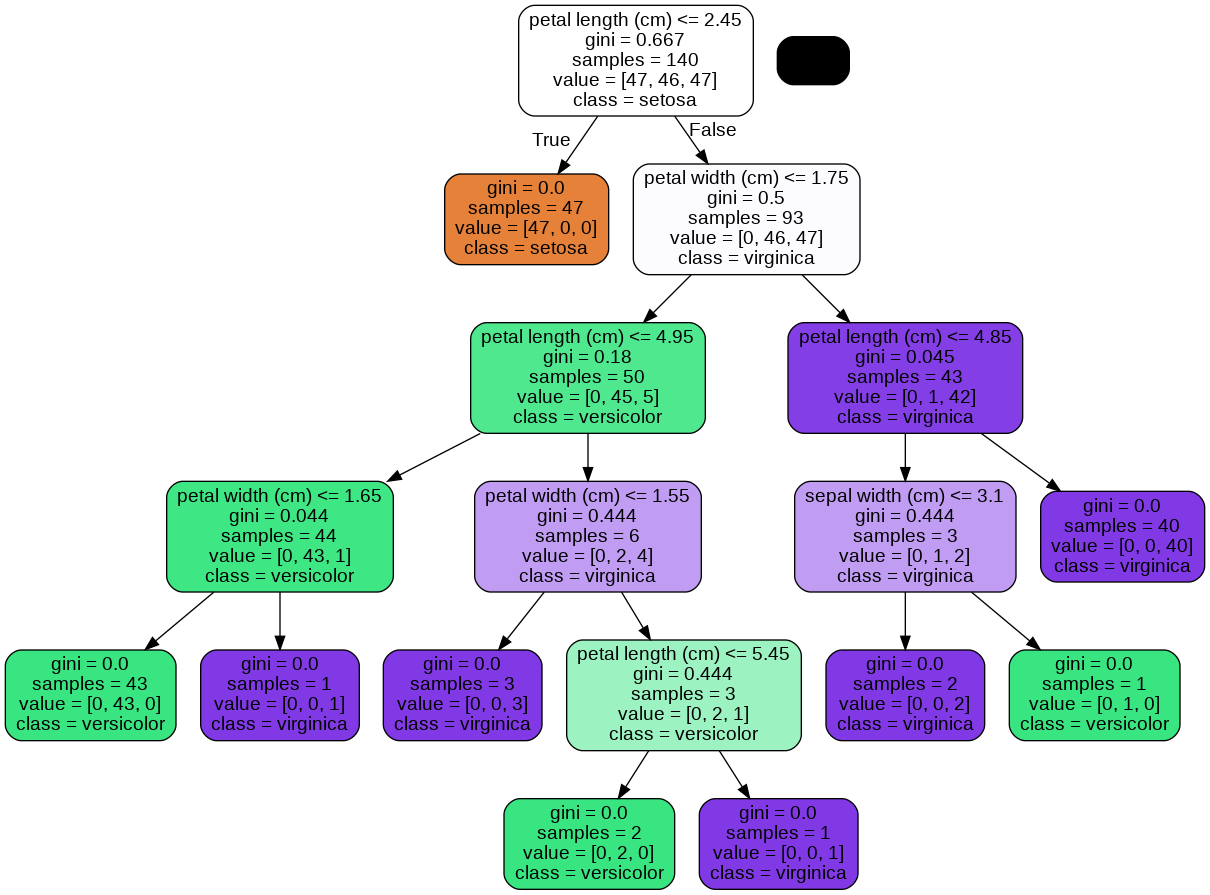

In [ ]:
(graph,) = pydot.graph_from_dot_file('img\desision_tree.dot')
graph.write_png('img\desision_tree.png')
Image(filename='img\desision_tree.png')

# Prediction using user given input data

In [ ]:
print("Class Names = ",iris.target_names)
print("Let us estimate the Class probabilities of flowers whose petal length and width and sepal length and width are user defined")
pl=float(input("Petal Length: "))
pw=float(input("Petal Width: "))
sl=float(input("Sepal Lenght: "))
sw=float(input("Sepal Width: "))
print("Our prediction says that the class of this flower is :",iris.target_names[classifier.predict([[pl,pw,sl,sw]])])

Class Names =  ['setosa' 'versicolor' 'virginica']
Let us estimate the Class probabilities of flowers whose petal length and width and sepal length and width are user defined
Petal Length: 6.5
Petal Width: 3.2
Sepal Lenght: 5.7
Sepal Width: 10.2
Our prediction says that the class of this flower is : ['virginica']


This model is 100% accurate. 

#Conclusion

I have used the decision tree classifier to successfully train a model to predict the species of flower from iris dataset with a high accuracy score.